# Intro to Geospatial Data using Python

## Disclaimer
* Not a GIS expert, just someone with the drive to self learn.
* Going to be talking mostly about Shape (.shp) files but other formats exist (geojson, raster, etc)
* Using Python 3.5, no guarantees everything works on 2.7

## Background
* What is GeoSpatial Data?
* Types of GeoSpatial Data
* What kinds of GeoSpatial Data is available?
* Where to get data?

## Technical
* Getting Set Up
* Reading in Data
* Exploring Data
    * Fields
    * Profiling
    * Visualization
* Filtering
    * Data Attributes
    * Geodesic Features
* Geodesic transformations
    * Units of Measure
    * Projections
* Geodesic Calculations
    * Centroid
    * Area
    * Perimeter
    * Distance between points
* Joins/merges
    * Joining tabular data
    * Joining on geodesic features
* Creating new data
    * New Fields
    * New Shapes
* Writing Data

## What is GeoSpatial Data?
The word geospatial is used to indicate that data that has a geographic component to it.  This means that the records in a dataset have locational information tied to them such as geographic data in the form of coordinates, address, city, or ZIP code. GIS data is a form of geospatial data.  Other geospatial data can originate from GPS data, satellite imagery, and geotagging. [1]

![](./img/gislayers.jpg)

[1]: https://www.gislounge.com/difference-gis-geospatial/

## Types of Geospatial Data

## Vector/Polygon Data
* A representation of the world using points, lines, and polygons. 
* Vector models are useful for storing data that has discrete boundaries, such as country borders, land parcels, and streets.
* Common formats are Shape Files, GeoJSON, KML (Keyhole Markup Language)
![](./img/GIS_Shape.jpg)

## Raster Data
* Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps
* Common formats are .JPG, .TIF, .GIF or similar format
![](./img/GIS_Raster.jpg)

## Tablular Files
* Numeric data is statistical data which includes a geographical component 
* Joined with vector files so the data can be queried and displayed as a layer on a map in a GIS. 
* The most common type of numeric data is demographic data from the US Census.
* Unique Identifiers (Hydrology Number, State, Metropolitan Statistical Area ID, Lat/Long, etc)
![](./img/GIS_tabular.jpg)

## What kinds of GeoSpatial Data is available?
![](./img/GIS_Categories.PNG)
### Government
* Local (MetCouncil, Minneapolis School District)
* State (DNR, MN PCA, Hennepin County)
* Federal (Census Bureau, NASA)

### Private
* Xcel Engery, Centerpoint, Google

## Where can I get Minnesota Geospatial Data?
[![MN GeoSpatial Commons](./img/mn_geospatial.PNG)](https://gisdata.mn.gov/)

# Getting Set Up

## Start with Anaconda 3.5
Anaconda is the de facto industry standard for Python Scientific Computing. Without it users are left to manage dependencies, find and compile low level C libraries and generally in for a huge headache. Added bonus is that you don't need administrator privledges to install if you install only for the local user.

### Download Here
[![Download Here](./img/Anaconda_Download.PNG)](https://www.continuum.io/downloads)

![conda-forge](./img/Conda_Forge.PNG)

## Install Additional Libraries

Conda is a packaging tool and installer that aims to do more than what pip does; handle library dependencies outside of the Python packages as well as the Python packages themselves.

## What is Conda Forge?

conda-forge is a github organization containing repositories of conda recipes. Each repository automatically builds its own recipe in a clean and repeatable way on Windows, Linux and OSX. 

Extremely valuable as you don't have to find and compile dependencies (which isn't fun on Linux/OSX and is a *NIGHTMARE* on Windows).

**Enable conda-forge repositories by running the cell below:**

In [ ]:
! conda config --add channels conda-forge

## Python Geospatial Libraries Covered in Notebook

* [geopandas][] - Working with spatial data is fun again!
* [shapely][] - For geometry handling
* [rtree][] - For efficiently querying spatial data
* [pyshp][] - For reading and writing shapefiles (in _pure_ Python)
* [pyproj][] - For conversions between projections
* [fiona][] - For making it _easy_ to read/write geospatial data formats
* [ogr/gdal][] - For reading, writing, and transforming geospatial data formats
* [geopy][] - For geolocating and things like that
* [pysal][] -  Spatial econometrics, exploratory spatial and spatio-temporal data analysis, spatial clustering (and more)
* [descartes][] - For plotting geometries in matplotlib

[pandas]: http://pandas.pydata.org/
[geopandas]: https://github.com/kjordahl/geopandas
[shapely]: https://pypi.python.org/pypi/Shapely
[rtree]: http://toblerity.github.io/rtree/
[geopy]: https://code.google.com/p/geopy/
[ogr/gdal]: https://pypi.python.org/pypi/GDAL/
[fiona]: http://toblerity.github.io/fiona/
[pysal]: http://pysal.org
[pyproj]: https://code.google.com/p/pyproj/
[pyshp]: https://code.google.com/p/pyshp/
[descartes]: https://pypi.python.org/pypi/descartes

### [Exhaustive List Here](https://github.com/SpatialPython/spatial_python/blob/master/packages.md)

### Install packages by running the cell below
* Type 'y' in results cell to proceed with install

In [ ]:
! conda install rtree
! conda install gdal
! conda install shapely
! conda install pyshp
! conda install pyproj
! conda install fiona
! conda install geopy
! conda install pysal
! conda install descartes
! conda install geopandas

## Install Additional GitHub Packages
Conda should be your go-to installer but some of the really specific libraries you need to install with Pip

* [pandas-profiling][] - Generates profile reports from a pandas DataFrame
* [geoplotlib][] - For visualizing geographical data and making maps
* [missingno][] - Provides a small toolset of flexible and easy-to-use missing data visualizations 

[pandas-profiling]: https://github.com/JosPolfliet/pandas-profiling
[geoplotlib]: https://github.com/andrea-cuttone/geoplotlib
[missingno]: https://github.com/ResidentMario/missingno



### Install packages by running the cell below
* Type 'y' in results cell to proceed with install

In [ ]:
! pip install https://github.com/JosPolfliet/pandas-profiling/archive/master.zip
! pip install https://github.com/andrea-cuttone/geoplotlib/archive/master.zip
! pip install https://github.com/ResidentMario/missingno/archive/master.zip

In [ ]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Set
## MetCouncil Generalized Land Use 2010
![](./img/metcouncil_landuse.jpg)

## Extract Data from zipfile

In [6]:
import zipfile

file = './data/2010_landuse.zip'

z = zipfile.ZipFile(file)
for name in z.namelist():
    z.extract(name,"./data/")

## [Review Meta Data](./data/metadata/metadata.html)

# Reading in Data

geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more

In [20]:
import geopandas as gpd

shp_file = './data/GeneralizedLandUse2010.dbf'

gdf = gpd.read_file(shp_file)

gdf.head()

,ACRES,LUSE2010,LUSE_DESC,Shape_Area,Shape_Leng,geometry
0,59548.391131,100,Agricultural,2.409848e+08,1.013022e+06,"POLYGON ((477085.9844 4934343.3261, 477085.546..."
1,53520.904726,100,Agricultural,2.165923e+08,6.428228e+05,"POLYGON ((500440.9953 4945547.944, 500615.518 ..."
2,47454.260908,100,Agricultural,1.920413e+08,1.167357e+06,"POLYGON ((429036.0224 4969715.8797, 429036.023..."
3,44440.129659,100,Agricultural,1.798435e+08,7.487410e+05,"POLYGON ((443065.6713 4949585.854, 443067.5833..."
4,36431.867337,100,Agricultural,1.474351e+08,6.333393e+05,"POLYGON ((449983.4234 4944678.9954, 449984.117..."


In [22]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 86586 entries, 0 to 86585
Data columns (total 6 columns):
ACRES         86586 non-null float64
LUSE2010      86586 non-null object
LUSE_DESC     86586 non-null object
Shape_Area    86586 non-null float64
Shape_Leng    86586 non-null float64
geometry      86586 non-null object
dtypes: float64(3), object(3)
memory usage: 4.0+ MB


# Exploring Data

# Fields

# Profiling

# Visualization

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

gdf.plot()

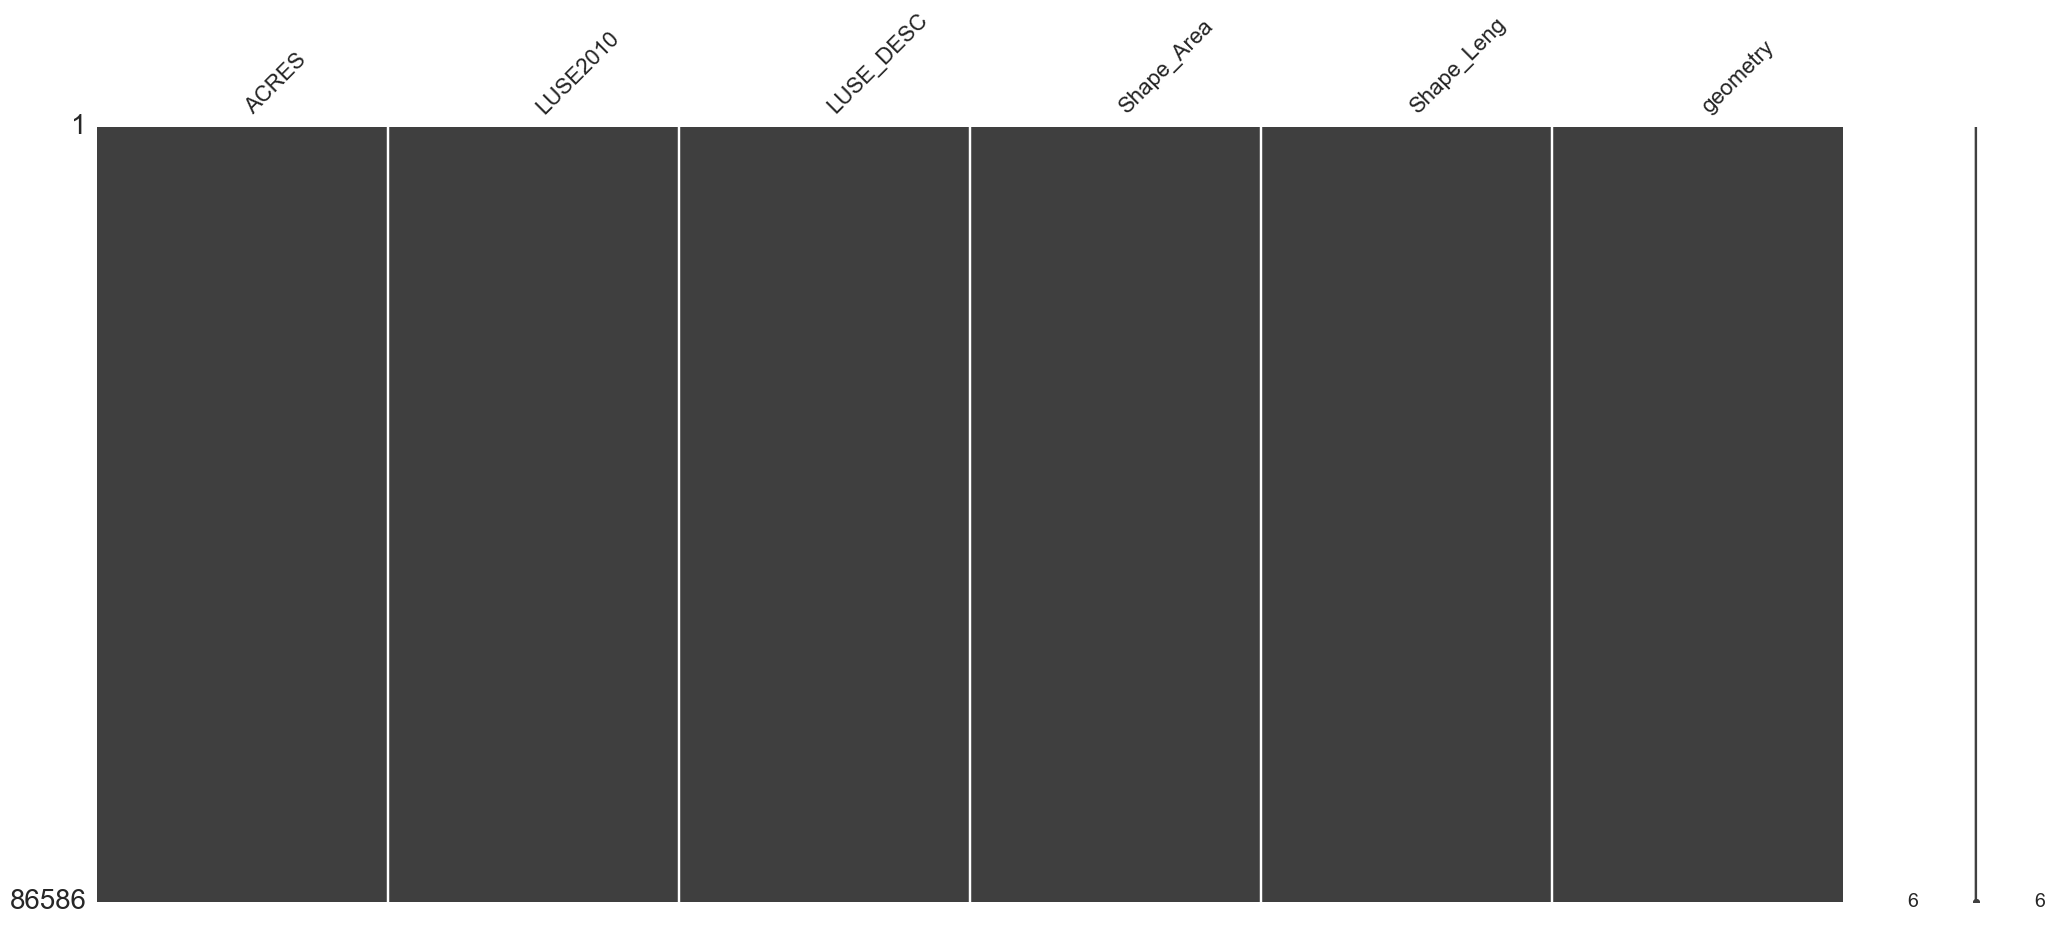

In [25]:
import missingno as msno

msno.matrix(gdf)

In [ ]:
msno.geoplot(collisions.sample(1000), x='LONGITUDE', y='LATITUDE', by='BOROUGH', geometry=geom)

# Filtering

# Filtering on Data Attributes

# Filtering on Geodesic Features

# Geospatial Transformations

# Transforming Units of Measure

# Transforming Projections

# Geospatial Calculations

# Calculate Centroid

# Calculate Area

# Calculate Perimeter

# Calculate Distance between Points

# Joins / Merges

# Joining Tablular Data to Geospatial Data

# Joining Geospatial Data Sets Together

# Writing Data Out